<a href="https://colab.research.google.com/github/IAMDSVSSANGRAL/deep-learning/blob/main/mnist_classification_usingANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the liabrary
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
#loading the dataset
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


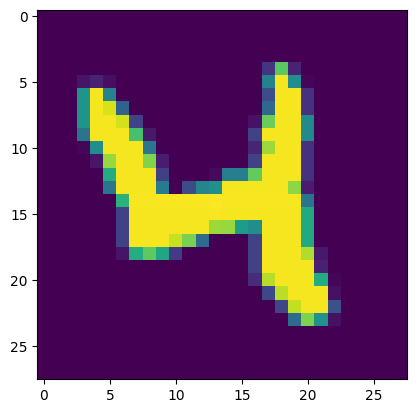

In [5]:
#To show the pixel value in image
import matplotlib.pyplot as plt
plt.imshow(X_train[20])

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [27]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'Adam',metrics=['accuracy'])

In [30]:
history = model.fit(X_train,y_train,epochs = 25, validation_split =0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2919 - accuracy: 0.9144 - val_loss: 0.1468 - val_accuracy: 0.9583
Epoch 2/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1227 - accuracy: 0.9629 - val_loss: 0.1204 - val_accuracy: 0.9638
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0859 - accuracy: 0.9736 - val_loss: 0.0897 - val_accuracy: 0.9726
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0631 - accuracy: 0.9797 - val_loss: 0.0856 - val_accuracy: 0.9736
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0480 - accuracy: 0.9851 - val_loss: 0.0923 - val_accuracy: 0.9737
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0420 - accuracy: 0.9865 - val_loss: 0.1014 - val_accuracy: 0.9727
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0317 - accuracy: 0.9900 - val_loss: 0.0985 - val_accuracy:

In [31]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [32]:
y_pred = y_prob.argmax(axis = 1)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9762

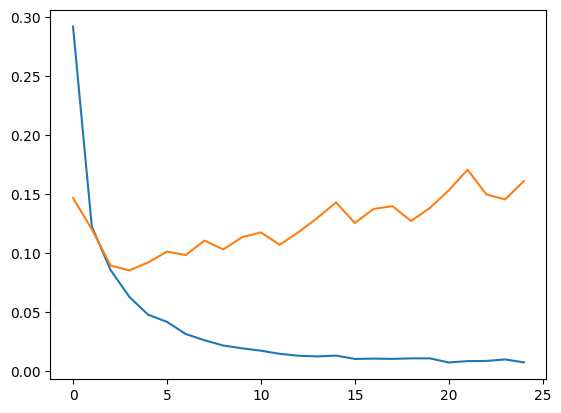

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

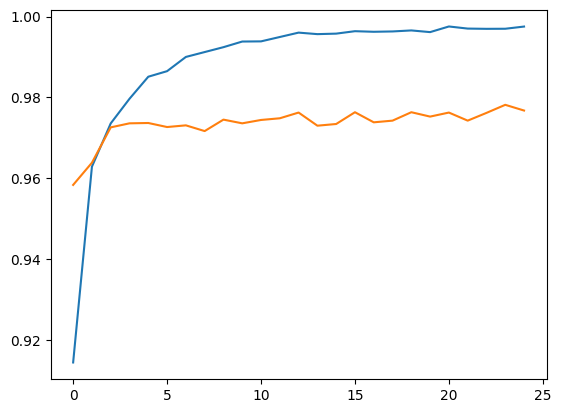

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

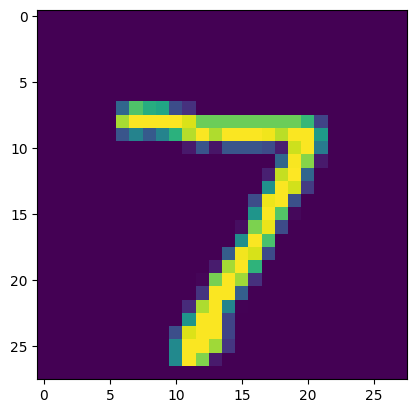

In [37]:
plt.imshow(X_test[0])

In [40]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 33ms/step


array([7])